## Student Name : Fergus Mc Hale
## Student ID : 18203485
## Classification

In [225]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [226]:
data = pd.read_csv('./Absenteeism_at_work.csv',sep=';', delimiter=None)

# Classification solves the problem of identifying the category to which a new data point belongs.

## Training Data

# https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [227]:
del data['ID']

In [228]:
data.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [229]:
data.isnull().sum().sort_values(ascending=False).head()

Absenteeism time in hours    0
Body mass index              0
Month of absence             0
Day of the week              0
Seasons                      0
dtype: int64

In [230]:
data['Age'].value_counts()

28    117
38    113
37     78
40     58
33     51
36     50
30     46
50     37
41     34
34     29
47     24
43     24
31     22
32     13
58      8
39      8
29      7
27      7
48      6
49      5
46      2
53      1
Name: Age, dtype: int64

In [231]:
data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [232]:
# Disciplinary Failure 1
# Unjustified Absenses 26
# Education less than graduate < 2

In [233]:
data_scaled = preprocessing.scale(data)
print("\nAFTER:")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))


AFTER:
Mean = [-1.63232791e-16 -1.34427004e-16  6.72135020e-17  5.76115732e-17
 -9.12183242e-17 -3.00060277e-17 -8.16163953e-17 -4.27285834e-16
 -4.22484870e-16 -2.49650150e-16  1.92038577e-17  1.34427004e-16
 -5.76115732e-17  7.68154309e-17 -5.04101265e-17 -9.60192886e-18
 -1.44028933e-17 -9.04981795e-16  1.12822664e-16  3.00060277e-17]
Std deviation = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [266]:
# Normalize data use l2 to find outliners
data_normalized_l1 = preprocessing.normalize(data, norm='l1')
data_normalized_l2 = preprocessing.normalize(data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1[data_normalized_l1 != 0.])
print("\nL2 normalized data:\n", data_normalized_l2[data_normalized_l2 != 0.])


L1 normalized data:
 [0.0248672  0.00669502 0.00286929 ... 0.08137651 0.18494661 0.02642094]

L2 normalized data:
 [0.05930386 0.01596642 0.00684275 ... 0.19440308 0.44182517 0.06311788]


In [235]:
variable_names = list(data)

## http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

In [236]:
# Find the Main Outliners to be used 
factor = FactorAnalysis().fit(data_normalized_l2)
pd.DataFrame(factor.components_ ,columns = variable_names)
transformed_outliner_factors = factor.transform(data_normalized_l2) # dimensionaly reduce the model
score = factor.score(data_normalized_l2)
score_of_each_sample = factor.score_samples(data_normalized_l2)

In [237]:
print('Outiners')
outliners = transformed_outliner_factors[transformed_outliner_factors != 0.]
print(outliners)

Outiners
[ 0.4242015  -0.99418546 -0.49961436 ...  0.42383909 -0.47450632
 -0.27414211]


In [238]:
def plot_histogram(x):
    plt.hist(x, color='blue', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [239]:
def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]

    return outlier_ind, outlier_value

In [240]:
# Age
tukey_indices, tukey_values = find_outliers_kde(data['Age'])
print(np.sort(tukey_values))

[53 58 58 58 58 58 58 58 58]


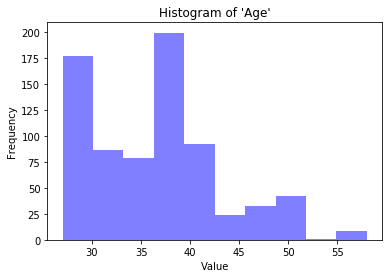

In [241]:
plot_histogram(data['Age'])

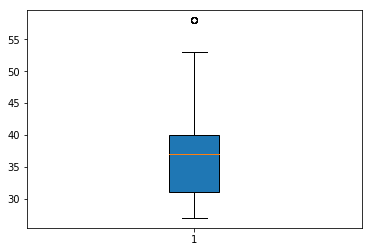

In [242]:
plt.boxplot(data['Age'],patch_artist=True, meanline=True)
plt.show()

In [243]:
# Hit Target
tukey_indices, tukey_values = find_outliers_kde(data['Hit target'])
print(np.sort(tukey_values))

[81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81]


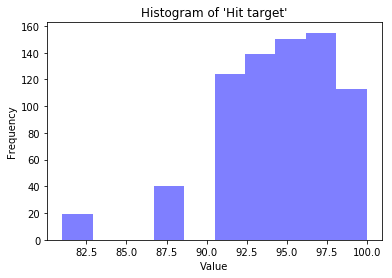

In [244]:
plot_histogram(data['Hit target'])

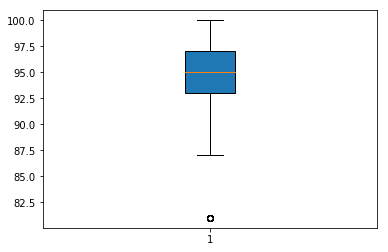

In [245]:
plt.boxplot(data['Hit target'],patch_artist=True, meanline=True)
plt.show()

In [246]:
#Service Time
tukey_indices, tukey_values = find_outliers_kde(data['Service time'])
print(np.sort(tukey_values))

[ 1  1  1  1  1  1  1 24 24 29 29 29 29 29]


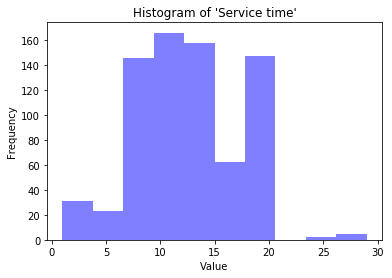

In [247]:
plot_histogram(data['Service time'])

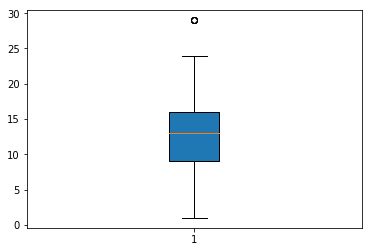

In [248]:
plt.boxplot(data['Service time'],patch_artist=True, meanline=True)
plt.show()

In [249]:
# Absenteeism time in hours
tukey_indices, tukey_values = find_outliers_kde(data['Absenteeism time in hours'])
print(np.sort(tukey_values))

[ 32  32  32  32  32  32  40  40  40  40  40  40  40  48  56  56  64  64
  64  80  80  80 104 112 112 120 120 120]


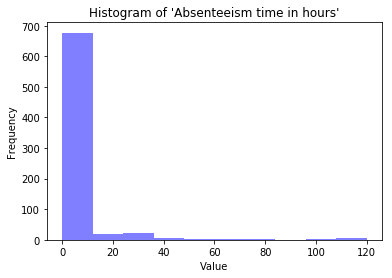

In [250]:
plot_histogram(data['Absenteeism time in hours'])

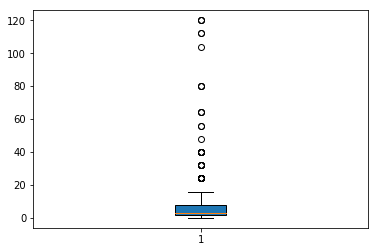

In [251]:
plt.boxplot(data['Absenteeism time in hours'],patch_artist=True, meanline=True)
plt.show()

In [252]:
# Son
tukey_indices, tukey_values = find_outliers_kde(data['Son'])
print(np.sort(tukey_values))

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


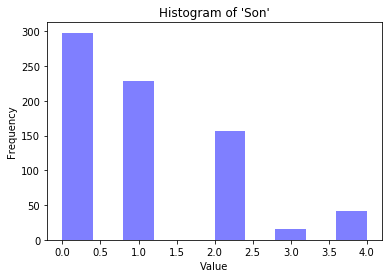

In [253]:
plot_histogram(data['Son'])

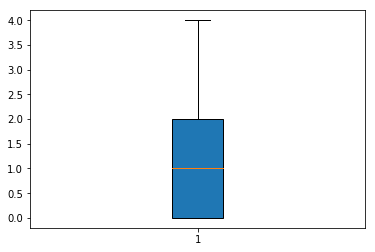

In [254]:
plt.boxplot(data['Son'],patch_artist=True, meanline=True)
plt.show()

In [255]:
# Weight
tukey_indices, tukey_values = find_outliers_kde(data['Weight'])
print(np.sort(tukey_values))

[108 108 108 108 108]


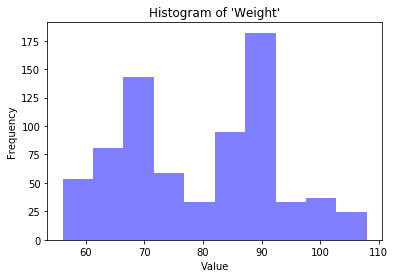

In [256]:
plot_histogram(data['Weight'])

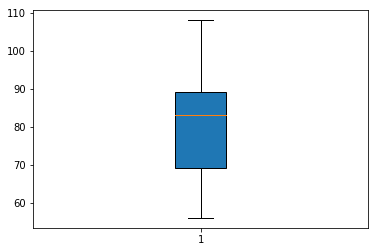

In [257]:
plt.boxplot(data['Weight'],patch_artist=True, meanline=True)
plt.show()

In [258]:
# Height
tukey_indices, tukey_values = find_outliers_kde(data['Height'])
print(np.sort(tukey_values))

[163 163 163 163 163 163 185 185 185 185 185 185 185]


In [259]:
# Body Mass Index
tukey_indices, tukey_values = find_outliers_kde(data['Body mass index'])
print(np.sort(tukey_values))

[34 35 35 36 36 36 36 36 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38]


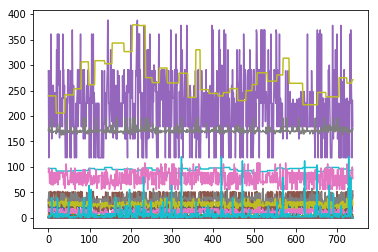

In [260]:
plt.plot(data)
plt.show()

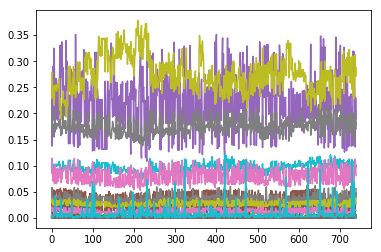

In [261]:
plt.plot(data_normalized_l1)
plt.show()

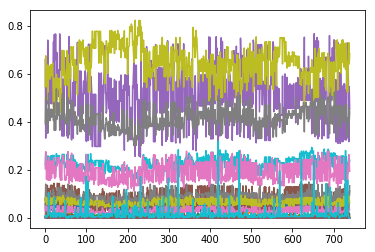

In [262]:
plt.plot(data_normalized_l2)
plt.show()

In [263]:
pprint(outliners.tolist())

[0.4242015007156788,
 -0.99418545620576,
 -0.4996143581865563,
 -0.020580586745878524,
 0.11862529843562775,
 0.35894051345672273,
 -0.15192498920948536,
 -1.7896157834161919,
 -0.7097230271677463,
 2.245296571107618,
 0.09430765283735323,
 0.5504009897383851,
 -0.18818745762704536,
 -1.0838520286804567,
 -1.1540677976152007,
 -0.9056619566682994,
 -0.6997756870030258,
 0.06460068776313782,
 -0.06254013404611783,
 -0.06543242721679955,
 -0.24846318103834722,
 0.553064930927774,
 -0.29166385674119705,
 0.4774109237898408,
 -0.03444134076525931,
 1.5961715502693394,
 -0.0704905091946731,
 0.03882650024409579,
 0.3923607857752827,
 -0.9694690774927256,
 -0.5476463225264081,
 -0.17484500493628388,
 0.22266094217370067,
 0.10252102523395575,
 -0.12959932221553686,
 -1.211207387277761,
 -0.8756845814017333,
 -0.8428438594690334,
 -0.11804292889094284,
 0.056945740312735776,
 -0.329105966417825,
 -0.17205145189903065,
 1.602867480793624,
 -0.8737581001380667,
 -0.9003570239408086,
 -0.4052479

 -0.49021525571370905,
 -0.6606101767385006,
 2.242919373096248,
 0.005834856578178943,
 1.2957967155590127,
 0.4434906193807668,
 0.5579608828659381,
 -0.7186332674643944,
 -0.6304044788149035,
 1.7588909933470596,
 0.24356585023437494,
 1.488906938009902,
 0.7148774753729965,
 -0.22909401194894136,
 -0.45229054188547724,
 -0.5516776197055653,
 0.04229700346739987,
 -0.07323277800408226,
 0.31693323738887835,
 1.2896473267058783,
 -0.6892518800217873,
 -0.5281798099257379,
 0.017749918076555814,
 -0.5630985612509429,
 0.32922861013422944,
 0.9103232707590262,
 1.4176018300176922,
 -0.2218440930105076,
 -0.0734412503476026,
 0.43464561485659,
 1.919353683758099,
 -0.18417751928833748,
 -0.3626161024792696,
 0.5241969595131042,
 -0.5763176694972467,
 -0.30662389462269407,
 -0.0735166743451808,
 0.7420751254222145,
 0.2712732596110142,
 0.33872230602087644,
 1.1927616902005727,
 -0.5031079524731272,
 -0.2297323992954461,
 0.25834744658317454,
 1.971822698057764,
 -0.2267808154102684,
 -0

 0.04620531344815628,
 -0.4559089702952196,
 -0.17573420065068293,
 -1.0105613655221217,
 -0.7555445346125487,
 -0.6781647363643276,
 0.5699271901013315,
 -0.20449869627670372,
 0.04579406557713598,
 -0.30608180949678193,
 -1.06627129476752,
 -0.7265826638379506,
 -0.8125298948759517,
 0.3967443369826885,
 -0.08350373175210403,
 -0.1958567948016677,
 -0.21854947605217,
 -0.9753218291662542,
 -0.7238637804708911,
 -0.3032276394951132,
 0.4207233871928543,
 0.04791935860237209,
 -0.24846326404853758,
 -0.25385987042747626,
 -0.03445798402819202,
 -0.24165829316928503,
 -0.5950394055053745,
 0.3137194399349193,
 0.2424857987326703,
 -0.14057332625600977,
 0.04683127122226453,
 -1.1222533224151414,
 -0.697233340654847,
 -0.9526558426241707,
 0.21782373425528193,
 0.03353228290064447,
 -0.4541106416672314,
 -0.14370820775676757,
 -0.026233722067277605,
 0.2097950728726708,
 -0.315518226256935,
 0.24612795489401734,
 0.25390786611940136,
 0.38970842883035217,
 -0.1754212573184442,
 -1.010111

 -0.23246690980218507,
 -0.00653150686723658,
 -0.006087490569414643,
 1.0660831558013695,
 -0.1439688332000278,
 0.5555068117848199,
 1.5125076301568192,
 -0.6104172669039973,
 0.1612221915179792,
 -0.03175549317367389,
 1.0794673846299165,
 -0.20815853521396335,
 0.47356757607178485,
 1.5660529158844507,
 -0.7286686210978561,
 0.19548306433105003,
 0.49297201737932994,
 1.6641697617816467,
 -0.22918353900350472,
 0.7165540174897519,
 -0.063116955834783,
 -0.07487056052115701,
 -0.25427146098380965,
 0.019611969558773482,
 1.0526898251883794,
 -0.07977264259210949,
 0.6374589036981003,
 1.458946981275801,
 -0.4921547961185689,
 0.1269582113317952,
 -0.004119179996385095,
 -0.6199251587528232,
 0.033545472385949564,
 0.7550275411108772,
 0.045438851380596425,
 -0.01111232807366826,
 -0.5096528597132403,
 0.012934177370404,
 1.0768155320945691,
 0.004903513488382601,
 0.5106553879328922,
 1.5910999115038802,
 -0.7163812062158419,
 0.15607903346822832,
 0.40230168186959553,
 1.6683491873

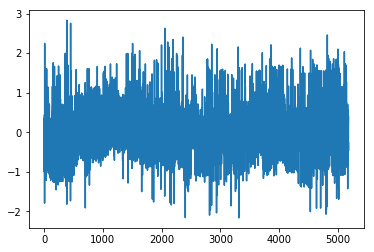

In [264]:
plt.plot(outliners)
plt.show()